# EM vs K-Means Algorithm
# Akshay Mittur
# 1BM18CS010

In [2]:
#Imports
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

# Dataset

In [3]:
#Dataset
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

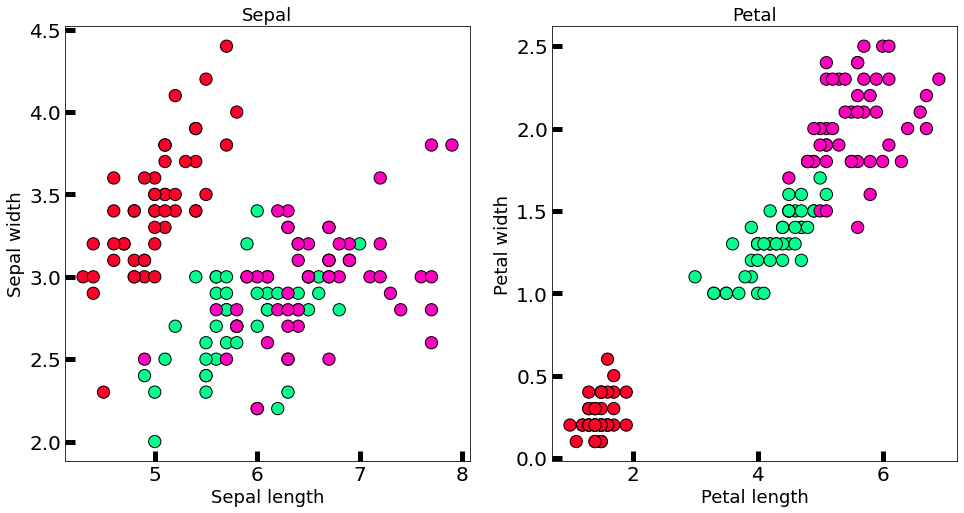

In [4]:
#Plot
sepal_X = iris.data[:, :2]
petal_X = iris.data[:, 2:]
y = iris.target
categories = len(iris.target_names)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(sepal_X[:, 0], sepal_X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(petal_X[:, 0], petal_X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sepal', fontsize=18)
axes[1].set_title('Petal', fontsize=18)
plt.show()

# Model

In [5]:
#Model
model_sepal = KMeans(n_clusters=3)
model_sepal.fit(sepal_X)
model_petal = KMeans(n_clusters=3)
model_petal.fit(petal_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#Analysis
def plot_centers(sepal_centers, petal_centers):
    plt.scatter([point[0] for point in sepal_centers], [point[1] for point in sepal_centers])
    plt.title('Sepal KMeans Centers')
    plt.show()

    plt.scatter([point[0] for point in petal_centers], [point[1] for point in petal_centers])
    plt.title('Petal KMeans Centers')
    plt.show()
    
def plot_actualvpredicted(X, y, predicted, part):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
    axes[1].scatter(X[:, 0], X[:, 1], c=predicted, cmap='jet', edgecolor='k', s=150)
    axes[0].set_xlabel(f'{part} length', fontsize=18)
    axes[0].set_ylabel(f'{part} width', fontsize=18)
    axes[1].set_xlabel(f'{part} length', fontsize=18)
    axes[1].set_ylabel(f'{part} width', fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('Predicted', fontsize=18)
    plt.show()
    
def plot_confusion(accuracy, confusion, part):
    print(f'{part} Accuracy: {accuracy}')

    fig, ax = plt.subplots()
    im = ax.imshow(confusion)

    ax.set_xticks(range(categories))
    ax.set_yticks(range(categories))
    ax.set_xticklabels(iris.target_names)
    ax.set_yticklabels(iris.target_names)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(categories):
        for j in range(categories):
            text = ax.text(j, i, confusion[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(f"{part} Confusion Matrix (Actual / Predicted)")
    fig.tight_layout()
    plt.show()

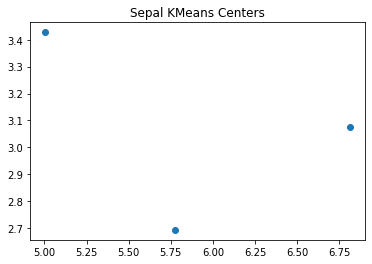

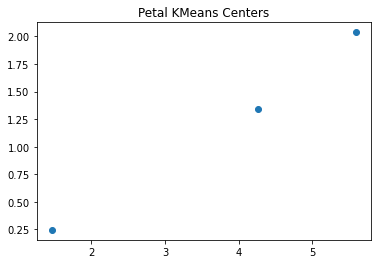

In [7]:
#Graph
sepal_centers = model_sepal.cluster_centers_
petal_centers = model_petal.cluster_centers_
plot_centers(sepal_centers, petal_centers)

In [8]:
sepal_labels = model_sepal.labels_
petal_labels = model_petal.labels_
print(sepal_labels, petal_labels, sep='\n')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


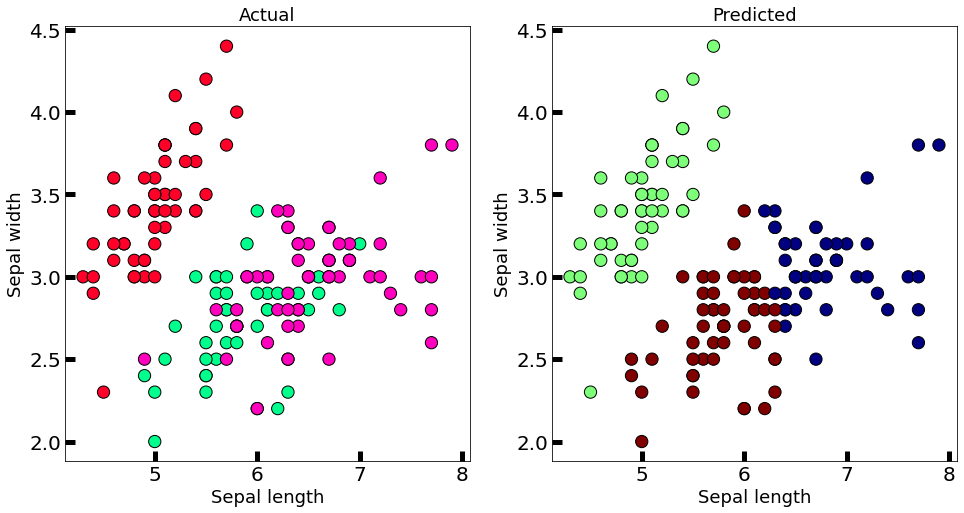

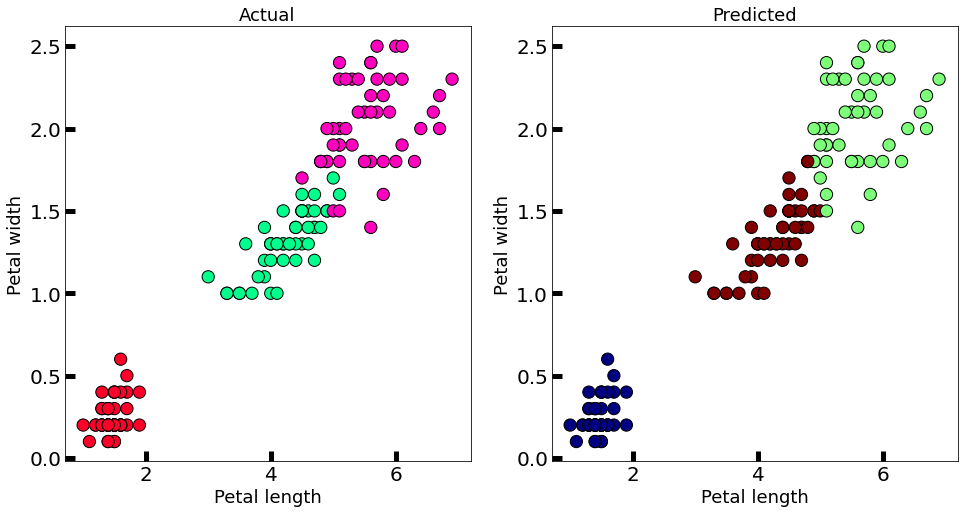

In [9]:
plot_actualvpredicted(sepal_X, y, sepal_labels, 'Sepal')
plot_actualvpredicted(petal_X, y, petal_labels, 'Petal')

In [10]:
sepal_accuracy = accuracy_score(y, sepal_labels)
petal_accuracy = accuracy_score(y, petal_labels)

sepal_confusion = confusion_matrix(y, sepal_labels)
petal_confusion = confusion_matrix(y, petal_labels)

Sepal Accuracy: 0.1


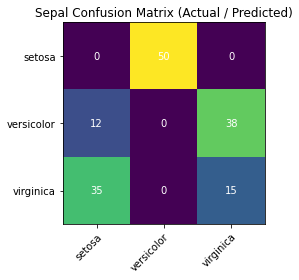

Petal Accuracy: 0.37333333333333335


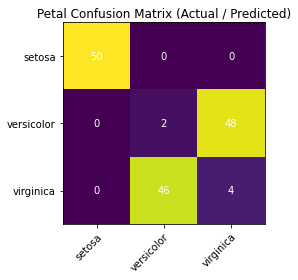

In [11]:
plot_confusion(sepal_accuracy, sepal_confusion, 'Sepal')
plot_confusion(petal_accuracy, petal_confusion, 'Petal')

# Different Number of Clusters





===========================1 clusters===========================


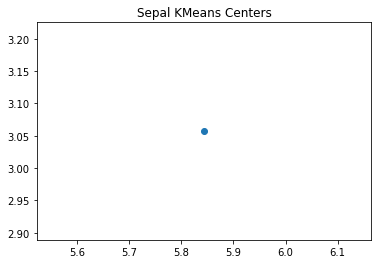

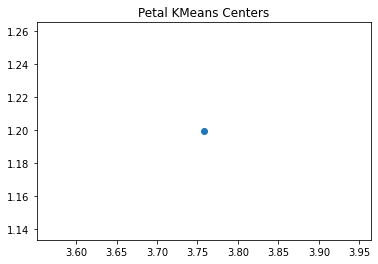

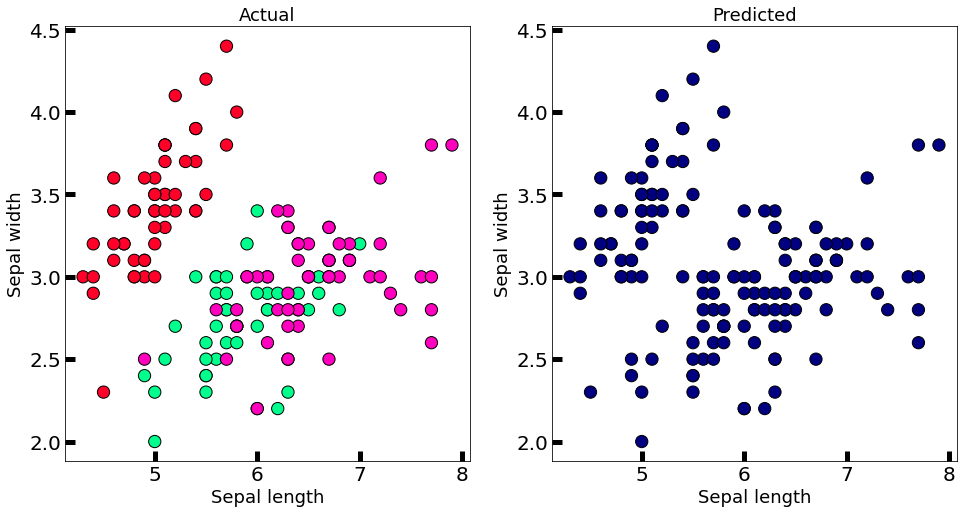

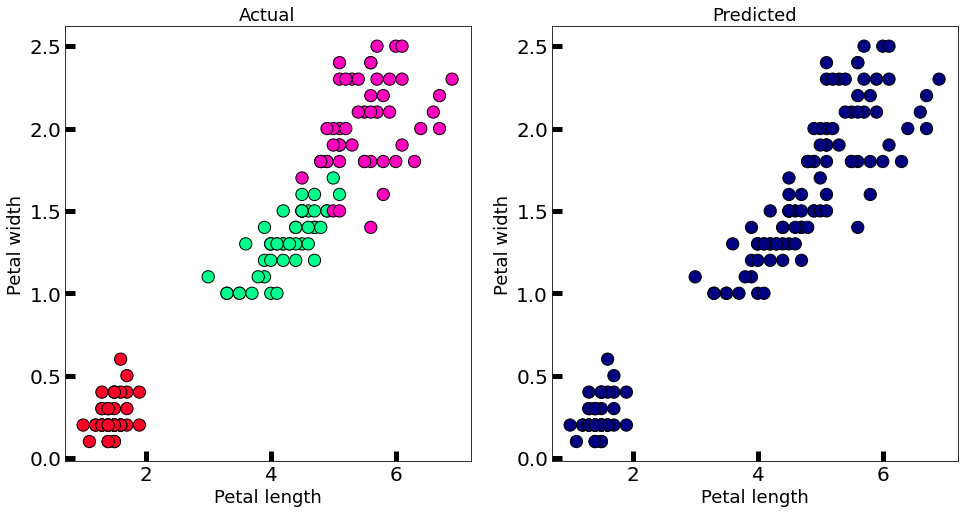

Sepal Accuracy: 0.3333333333333333


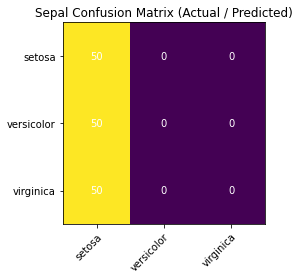

Petal Accuracy: 0.3333333333333333


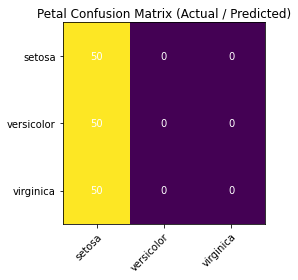





===========================2 clusters===========================


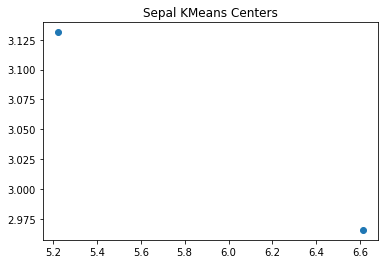

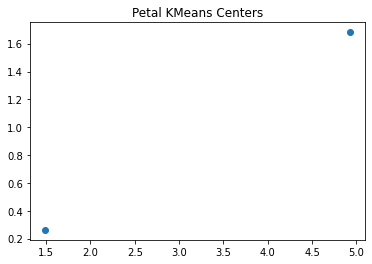

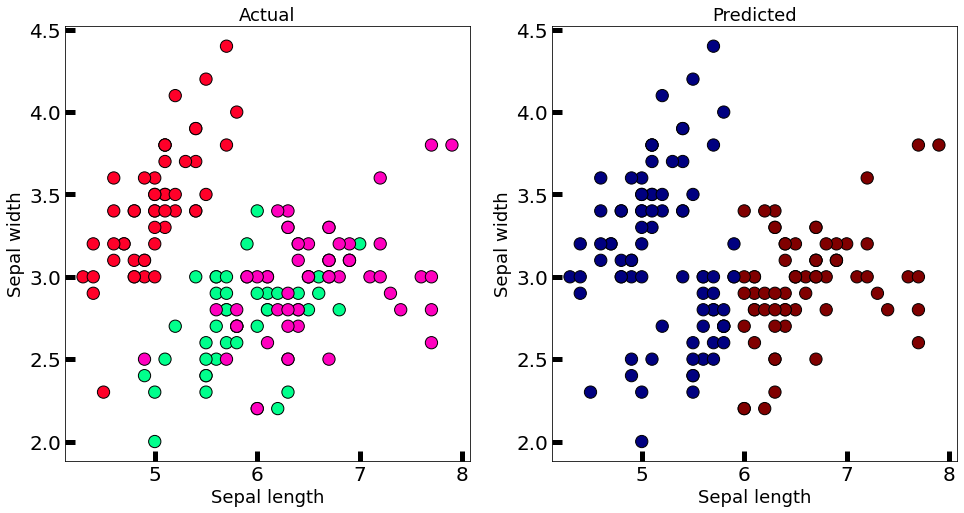

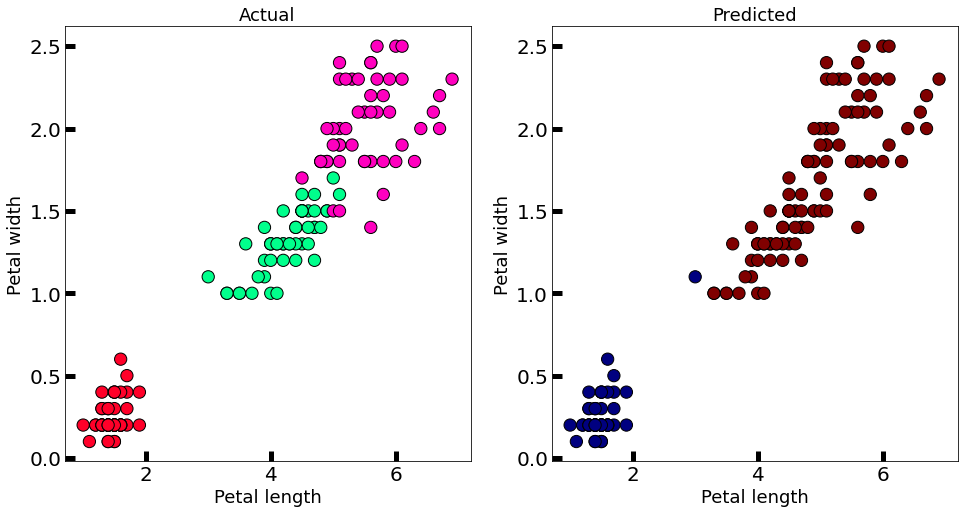

Sepal Accuracy: 0.49333333333333335


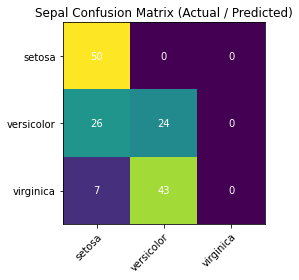

Petal Accuracy: 0.66


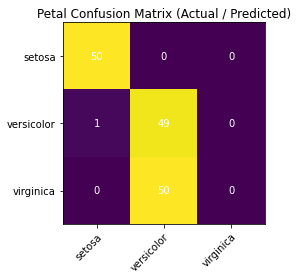





===========================3 clusters===========================


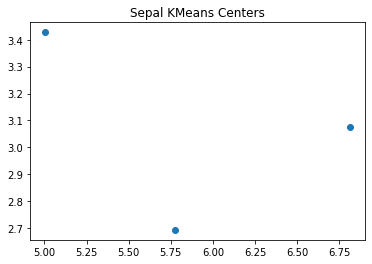

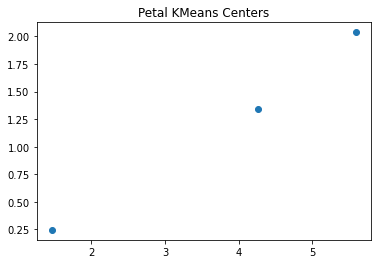

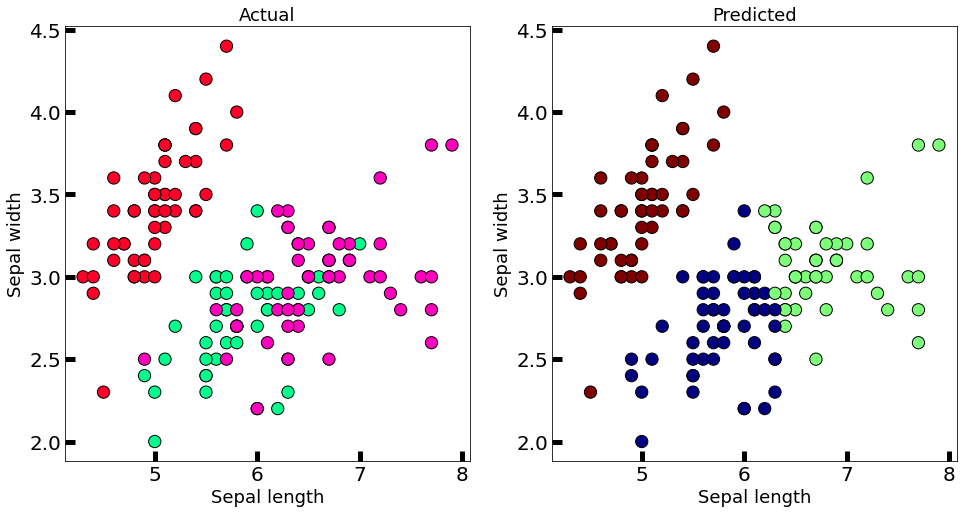

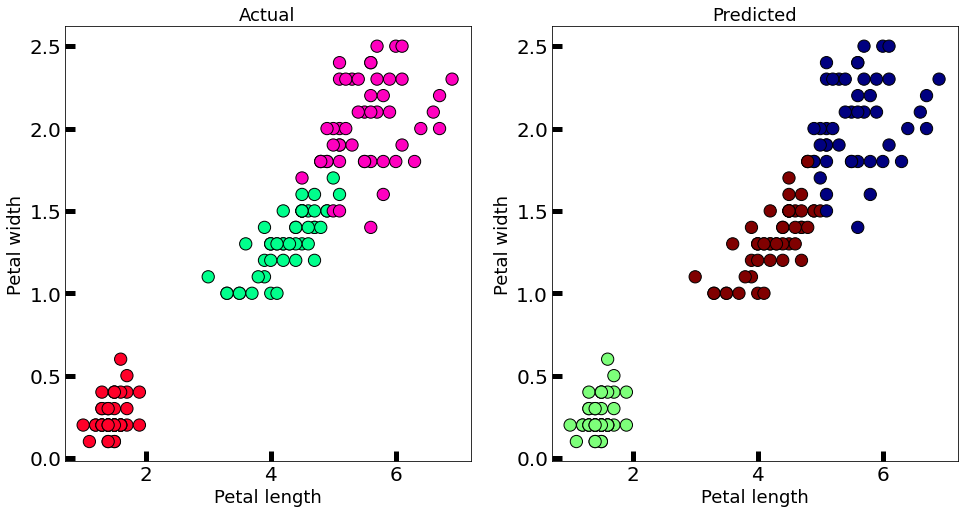

Sepal Accuracy: 0.08


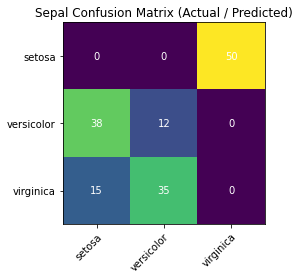

Petal Accuracy: 0.02666666666666667


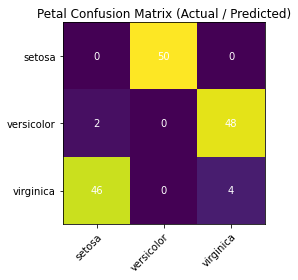

In [12]:
for n_clusters in range(1, 4):
    print(f'\n\n\n\n==========================={n_clusters} clusters===========================')
    
    model_sepal = KMeans(n_clusters=n_clusters)
    model_sepal.fit(sepal_X)
    model_petal = KMeans(n_clusters=n_clusters)
    model_petal.fit(petal_X)
    
    sepal_centers = model_sepal.cluster_centers_
    petal_centers = model_petal.cluster_centers_
    
    plot_centers(sepal_centers, petal_centers)
    
    sepal_labels = model_sepal.labels_
    petal_labels = model_petal.labels_
    
    plot_actualvpredicted(sepal_X, y, sepal_labels, 'Sepal')
    plot_actualvpredicted(petal_X, y, petal_labels, 'Petal')
    
    sepal_accuracy = accuracy_score(y, sepal_labels)
    petal_accuracy = accuracy_score(y, petal_labels)
    sepal_confusion = confusion_matrix(y, sepal_labels)
    petal_confusion = confusion_matrix(y, petal_labels)
    
    plot_confusion(sepal_accuracy, sepal_confusion, 'Sepal')
    plot_confusion(petal_accuracy, petal_confusion, 'Petal')